In [6]:
import skimage.io as io
import time
import numpy as np
from sklearn.naive_bayes import GaussianNB
from ChainCodesFeatures import *
from PolygonFeatures import * 
from WindowFeatures import *
from windows import *

In [7]:
def Feature_Extractor(img):
    st = time.time()
    edged = cv2.Canny(img, 30, 200)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    en = time.time()
    print("Contours : ",(en-st)*1000,"ms")
    
    st = time.time()
    windows, clusters, clusteredWindows = getClusteredWindows(img,13,10)
    en = time.time()
    plotImages(clusteredWindows)
    print("Kesho : ",(en-st)*1000,"ms")
    
    st = time.time()
    F1,F2,F3,F4,F5,F7,F8,F9 = Chain_Codes_Feature_Extractor(img,contours,clusteredWindows)
    en = time.time()
    print("Ramzy : ",(en-st)*1000,"ms")
    
    st = time.time()
    f10, f11, f12, f13, f14 = PolygonFeatures(contours)
    en = time.time()
    print("Ibrahim Lefta : ",(en-st)*1000,"ms")
    
    st = time.time()
    Windows = list()
    for i in range(clusteredWindows.shape[0]):
        Windows  += WindowFeatures(clusteredWindows[i])
    en = time.time()
    print("October : ",(en-st)*1000,"ms")
    
    Features = list(F1)+list(F2)+list(F3)+list(F4)+list(F5)+list(F7)+list(F8)+list(F9)+list(f10)+list(f11)+list(f12)+list(f13)+list(f14)+Windows
    return Features
    

Contours :  34.56711769104004 ms


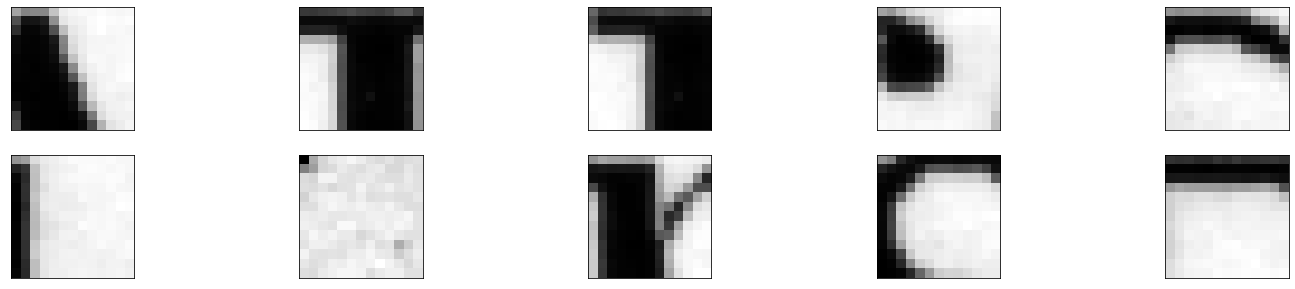

Kesho :  16250.873804092407 ms
Ramzy :  1003.4570693969727 ms
Ibrahim Lefta :  1149.3911743164062 ms


error: OpenCV(4.4.0) /tmp/pip-req-build-v7sdauef/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [8]:
img = io.imread("TestCases/class1_0.png")
f = Feature_Extractor(img)

In [ ]:
features_train = np.array([Features_0,Features_1])

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(features_train,[0,1])

In [ ]:
result = gnb.predict([Features_pred])